# Telecom Churn Case Study

### 1. Data Understanding and Exploration

Let's load and understand the data first.

In [1]:
# Loading important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import sklearn
import imblearn
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
# loading the data

telecom_churn_data = pd.read_csv('E:\Data Science\Python/telecom_churn_data.csv')
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Checking the no. of cols and rows in the dataset

telecom_churn_data.shape

(99999, 226)

In [4]:
# Checking the column info

telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Checking the summary stats

telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


**Filtering high-value customers**

In [6]:
# calculating total data recharge done by customer in 6th and 7th month(good phase)
telecom_churn_data['total_data_amt_6'] = telecom_churn_data['total_rech_data_6'].fillna(0) * telecom_churn_data['av_rech_amt_data_6'].fillna(0)
telecom_churn_data['total_data_amt_7'] = telecom_churn_data['total_rech_data_7'].fillna(0) * telecom_churn_data['av_rech_amt_data_7'].fillna(0)
#telecom_churn_data['total_data_amt_7'].head()

# calculating total rech done by customer in both these months
telecom_churn_data['total_rech_6'] = telecom_churn_data['total_rech_amt_6'] + telecom_churn_data['total_data_amt_6']
telecom_churn_data['total_rech_7'] = telecom_churn_data['total_rech_amt_7'] + telecom_churn_data['total_data_amt_7']

#dropping the columns related to data recgarge as we have derived a new feature using the same.
telecom_churn_data = telecom_churn_data.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7'])

In [7]:
# calculating the average recharge done in first 2 months(good phase)
telecom_churn_data['avg_rech_6_7'] = (telecom_churn_data['total_rech_6'] + telecom_churn_data['total_rech_7']) / 2

# calculating the 70th percentile of the above average
avg_rech_thresh = telecom_churn_data['avg_rech_6_7'].quantile(0.7)
avg_rech_thresh

478.0

In [8]:
# Now, let's finally filter the high-value customers

telecom_churn_data = telecom_churn_data.loc[telecom_churn_data['avg_rech_6_7'] >= avg_rech_thresh]
telecom_churn_data.shape

(30001, 227)

In [9]:
# Checking null values

null_vals = round(telecom_churn_data.isnull().sum()/len(telecom_churn_data.index) * 100,2)
missing_cols = null_vals[null_vals > 30.0]

len(missing_cols) #36

missing_cols.sort_values(ascending=False)

fb_user_9                   49.27
arpu_2g_9                   49.27
date_of_last_rech_data_9    49.27
total_rech_data_9           49.27
max_rech_data_9             49.27
count_rech_2g_9             49.27
av_rech_amt_data_9          49.27
arpu_3g_9                   49.27
count_rech_3g_9             49.27
night_pck_user_9            49.27
arpu_2g_8                   46.83
fb_user_8                   46.83
date_of_last_rech_data_8    46.83
total_rech_data_8           46.83
max_rech_data_8             46.83
count_rech_2g_8             46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
av_rech_amt_data_8          46.83
arpu_3g_8                   46.83
count_rech_3g_6             44.15
arpu_3g_6                   44.15
count_rech_2g_6             44.15
max_rech_data_6             44.15
fb_user_6                   44.15
night_pck_user_6            44.15
arpu_2g_6                   44.15
date_of_last_rech_data_6    44.15
count_rech_3g_7             43.15
arpu_2g_7     

So, there are almost 36 columns with null values more than 43%. We can straight away go and drop these.

In [10]:
missing_list = missing_cols.index.tolist()
telecom_churn_data = telecom_churn_data.drop(columns=missing_list, axis=1)

In [11]:
# Checking the info again

telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 191 entries, mobile_number to avg_rech_6_7
dtypes: float64(148), int64(35), object(8)
memory usage: 43.9+ MB


Let's impute the remaining null values with '0' as blank in these columns are pointing towards a customer not doing recharge. Few customers have churned when we check the corresponding rows. So, instead of dropping rows, we are imputing the null values with '0'.

In [14]:
telecom_churn_data = telecom_churn_data.apply(lambda x: x.fillna(0))
telecom_churn_data.isnull().sum()

mobile_number       0
circle_id           0
loc_og_t2o_mou      0
std_og_t2o_mou      0
loc_ic_t2o_mou      0
                   ..
total_data_amt_6    0
total_data_amt_7    0
total_rech_6        0
total_rech_7        0
avg_rech_6_7        0
Length: 191, dtype: int64

In [15]:
# Checking the shape of the dataframe again

telecom_churn_data.shape

(30001, 191)

In [16]:
# Let's get columns which have same value in all rows and hence offer no variance.

same_value_cols = ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']

# Let's go ahead and drop such columns
telecom_churn_data.drop(columns=same_value_cols, inplace=True)

**Deriving new features**

In [17]:
# Let's create a column arpu_6_7 which will represent the average revenue per user for both the months in good phase

arpu_6_7 = (telecom_churn_data['arpu_6'] + telecom_churn_data['arpu_7'])

# Let's drop the above the columns arpu_6 and arpu_7
telecom_churn_data = telecom_churn_data.drop(columns=['arpu_6', 'arpu_7'], axis=1)

In [18]:
# Let's create a column onnet_mou_6_7 which will represent all kinds of calls within the same netwrok for both the months in
# good phase
telecom_churn_data['onnet_mou_6_7'] = (telecom_churn_data['onnet_mou_6'] + telecom_churn_data['onnet_mou_7'])

# Let's drop the above the columns arpu_6 and arpu_7
telecom_churn_data.drop(columns=['onnet_mou_6', 'onnet_mou_7'], inplace=True, axis=1)

In [19]:
# Let's create a column offnet_mou_6_7 which will represent all kinds of calls outside the operator T netwrok for both the 
# months in good phase
telecom_churn_data['offnet_mou_6_7'] = (telecom_churn_data['offnet_mou_6'] + telecom_churn_data['offnet_mou_7'])

# Let's drop the above the columns arpu_6 and arpu_7
telecom_churn_data.drop(columns=['offnet_mou_6', 'offnet_mou_7'], inplace=True, axis=1)

**Tagging churners**

In [20]:
# Let's tag the churners

telecom_churn_data['churn'] = np.where(((telecom_churn_data['total_ic_mou_9'] == 0) & (telecom_churn_data['total_og_mou_9'] == 0) & 
                                       (telecom_churn_data['vol_2g_mb_9'] == 0) & (telecom_churn_data['vol_3g_mb_9'] == 0)), 
                                       1, 0)

telecom_churn_data.loc[:, ['mobile_number','churn']].head()

,mobile_number,churn
0,7000842753,1
7,7000701601,1
8,7001524846,0
21,7002124215,0
23,7000887461,0


In [21]:
telecom_churn_data['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [22]:
telecom_churn_data['churn'].value_counts()*100/telecom_churn_data.shape[0]

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [23]:
# Dropping all attributes of last(9th) month

last_month_attrib = telecom_churn_data.columns[pd.Series(telecom_churn_data.columns).str.endswith("_9")].tolist()
telecom_churn_data = telecom_churn_data.drop(columns=last_month_attrib, axis=1)

# There is one more attribute related to 9th month or September 'sep_vbc_3g'. Let's drop that as well.
telecom_churn_data = telecom_churn_data.drop(columns='sep_vbc_3g', axis=1)

In [24]:
# Seperating out numeric and categorical variables

num_cols = telecom_churn_data.select_dtypes(include=np.number).columns.tolist()

# categorical columns
categ_cols = telecom_churn_data.select_dtypes(exclude=np.number).columns.tolist()
categ_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [25]:
# Let's delete the above date columns as they do not seem to add much value to the model.
telecom_churn_data = telecom_churn_data.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom_churn_data.shape

(30001, 136)

In [26]:
# Removing the mobile_number  and the churn columns from numeric
num_cols.remove('mobile_number')
num_cols.remove('churn')

### 2. Data Preparation

#### Checking the Churn Rate

In [27]:
churn = (sum(telecom_churn_data['churn'])/len(telecom_churn_data['churn'].index))*100
churn

8.136395453484884

Data is highly imbalanced. As only 2.6% people have churned that is belong to class=1 and remaining 97% belong to class=0.

### Splitting Data into Training and Test Sets

In [28]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_churn_data['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the Features

In [30]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
#Apply scaler to all variables except 'Yes=No' and dummy variables

#fit_transform on X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#transform on X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

### 3. Modelling

#### Creating a basic Logistic Regression model to see some important predictor variables

In [32]:
# Basic Logistic Regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20877
Model Family:                Binomial   Df Model:                          122
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3660.0
Date:                Mon, 27 Jan 2020   Deviance:                       7320.0
Time:                        23:12:49   Pearson chi2:                 3.80e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1046      0.072    -56.997      0.000      -4.246      -3.963
loc_og_t2o_mou      3.296e-07    1.3e-07      2.533      0.011    7.45e-08    5.85e-07
std_og_t2o_mou      5.782e-08   1.28e-07      0.451      0.652   -1.93e-07    3.09e-07
loc_ic_t2o_mou     -6.715e-08   7.52e-08     -0.893      0.372   -2.15e-07    8.02e-08
arpu_8                -0.1137      0.172     -0.660      0.509      -0.451       0.224
onnet_mou_8           -4.8203      2.389     -2.018      0.044      -9.503      -0.138
offnet_mou_8          -5.4375      2.485     -2.188      0.029     -10.308      -0.567
roam_ic_mou_6          0.0714      0.036      1.958      0.050   -6.08e-05       0.143
roam_ic_mou_7          0.0284      0.036      0.793      0.428      -0.042       0.099
roam_ic_mou_8         -0.0527      0.033     -1.580      0.114      -0.118       0.013
roam_og_mou_6         -0.1171      0.326     -0.360      0.719      -0.755       0.521
roam_og_mou_7          0.0085      0.279      0.031      0.976      -0.538       0.555
roam_og_mou_8          1.1063      0.527      2.100      0.036       0.074       2.139
loc_og_t2t_mou_6    -870.1389   1333.969     -0.652      0.514   -3484.670    1744.392
loc_og_t2t_mou_7   -1527.1318   1438.214     -1.062      0.288   -4345.979    1291.716
loc_og_t2t_mou_8    7838.7649   1610.662      4.867      0.000    4681.926     1.1e+04
loc_og_t2m_mou_6    -966.6621   1481.774     -0.652      0.514   -3870.886    1937.561
loc_og_t2m_mou_7   -1525.4336   1436.482     -1.062      0.288   -4340.887    1290.020
loc_og_t2m_mou_8    7907.6538   1624.811      4.867      0.000    4723.083    1.11e+04
loc_og_t2f_mou_6     -86.4795    132.518     -0.653      0.514    -346.210     173.251
loc_og_t2f_mou_7    -139.1714    131.059     -1.062      0.288    -396.041     117.699
loc_og_t2f_mou_8     651.1784    133.782      4.867      0.000     388.970     913.386
loc_og_t2c_mou_6      -0.1228      0.042     -2.949      0.003      -0.204      -0.041
loc_og_t2c_mou_7      -0.0157      0.047     -0.331      0.740      -0.109       0.077
loc_og_t2c_mou_8       0.0316      0.049      0.645      0.519      -0.064       0.128
loc_og_mou_6       -1965.3979   2772.974     -0.709      0.478   -7400.326    3469.530
loc_og_mou_7        2355.0302   2957.429      0.796      0.426   -3441.424    8151.484
loc_og_mou_8       -3504.3161   3362.676     -1.042      0.297   -1.01e+04    3086.407
std_og_t2t_mou_6    2020.8841   2893.276      0.698      0.485   -3649.834    7691.602
std_og_t2t_mou_7     550.7859   3126.562      0.176      0.860   -5577.163    6678.735
std_og_t2t_mou_8    8819.7027   3575.853      2.466      0.014    1811.160    1.58e+04
std_og_t2m_mou_6    2042.0878   2923.771      0.698      0.485   -3688.397    7772.573
std_og_t2m_mou_7     574.8262   3262.8

As per the above basic Logistic Regression model, given below are few features which have pretty low p-values indicating a strong influence in predicting the churners.
* offnet_mou_8
* roam_ic_mou_6
* roam_og_mou_8
* loc_og_t2t_mou_8
* loc_og_t2m_mou_8
* loc_og_t2f_mou_8
* std_og_t2t_mou_8
* std_og_t2m_mou_8
* std_og_t2f_mou_8
* std_og_mou_7
* isd_og_mou_8
* spl_og_mou_8
* total_og_mou_8
* loc_ic_t2t_mou_7
* loc_ic_t2t_mou_8
* loc_ic_t2m_mou_7
* loc_ic_t2m_mou_8
* loc_ic_t2f_mou_7
* loc_ic_t2f_mou_8
* std_ic_t2t_mou_6
* std_ic_t2m_mou_6
* std_ic_t2f_mou_6
* std_ic_mou_8
* total_ic_mou_8
* spl_ic_mou_8
* isd_ic_mou_8
* ic_others_8
* total_rech_num_7
* total_rech_num_8
* max_rech_amt_8
* last_day_rch_amt_8
* monthly_2g_8
* monthly_3g_8

As we can see majority of the variables belong to the 8th month i.e. action phase. Let's check correlation matrix for the same.

**Correlation Matrix**

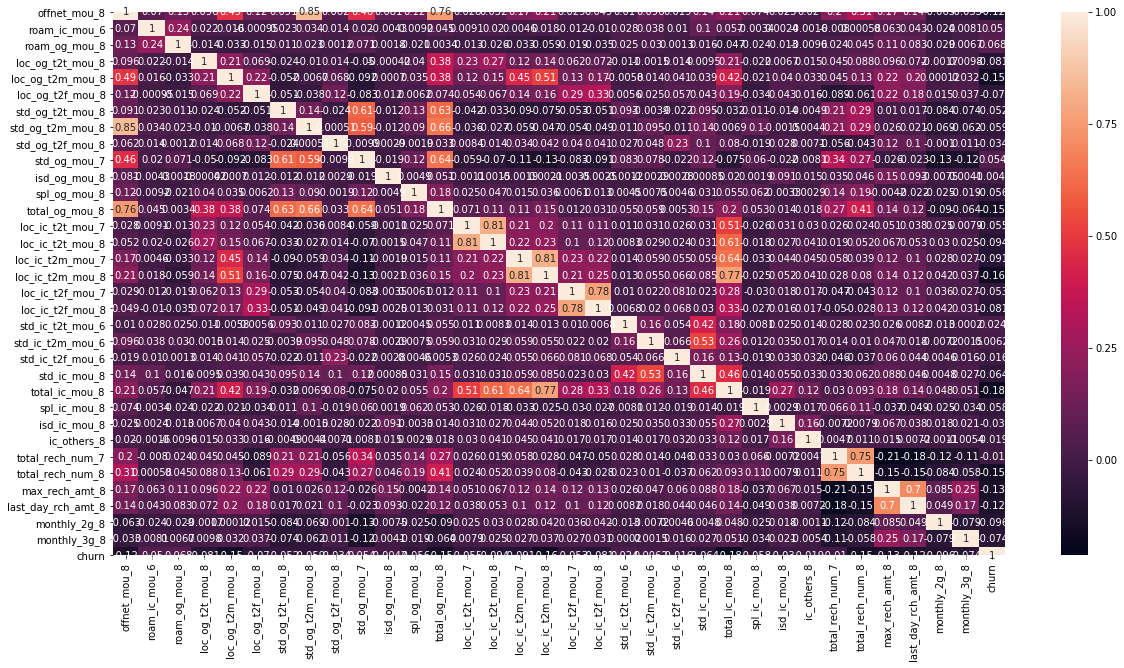

In [33]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
imp_cols = ['offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
            'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_8',
            'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7',
            'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_8', 'total_ic_mou_8', 
            'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8',
            'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'churn']
sns.heatmap(telecom_churn_data[imp_cols].corr(),annot = True)

Some variables are highly correlated, let's go ahead and remove few.

In [34]:
telecom_churn_data = telecom_churn_data.drop(columns=['total_rech_num_7','last_day_rch_amt_8', 'loc_ic_t2f_mou_7',
                                                      'std_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'offnet_mou_8', 'std_og_mou_7',
                                                      'loc_ic_t2t_mou_7','std_og_t2t_mou_8', 'std_og_t2m_mou_8'], axis=1)
telecom_churn_data.shape

(30001, 126)

#### Feature Selection using RFE

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train,y_train)

In [36]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_amt_6',
       'total_data_amt_7', 'total_rech_6', 'total_rech_7', 'avg_rech_6_7',
       'onnet_mou_6_7', 'offnet_mou_6_7'],
      dtype='object', length=124)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 125),
 ('std_og_t2o_mou', False, 124),
 ('loc_ic_t2o_mou', False, 123),
 ('arpu_8', False, 30),
 ('onnet_mou_8', False, 6),
 ('offnet_mou_8', False, 7),
 ('roam_ic_mou_6', False, 50),
 ('roam_ic_mou_7', False, 80),
 ('roam_ic_mou_8', False, 81),
 ('roam_og_mou_6', False, 109),
 ('roam_og_mou_7', False, 11),
 ('roam_og_mou_8', False, 27),
 ('loc_og_t2t_mou_6', False, 42),
 ('loc_og_t2t_mou_7', False, 36),
 ('loc_og_t2t_mou_8', False, 29),
 ('loc_og_t2m_mou_6', False, 97),
 ('loc_og_t2m_mou_7', False, 94),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 90),
 ('loc_og_t2f_mou_7', False, 74),
 ('loc_og_t2f_mou_8', False, 71),
 ('loc_og_t2c_mou_6', False, 48),
 ('loc_og_t2c_mou_7', False, 82),
 ('loc_og_t2c_mou_8', False, 63),
 ('loc_og_mou_6', False, 96),
 ('loc_og_mou_7', False, 88),
 ('loc_og_mou_8', False, 56),
 ('std_og_t2t_mou_6', False, 41),
 ('std_og_t2t_mou_7', False, 87),
 ('std_og_t2t_mou_8', False, 53),
 ('std_og_t2m_mou_6', False, 102),


In [38]:
col = X_train.columns[rfe.support_]

In [39]:
# Assessing the model using statsmodels

X_train_lm = sm.add_constant(X_train[col])

#### Model 1: Logistic Regression Model to find important predictors

In [40]:
# Running the linear model again

logm2 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4133.5
Date:                Mon, 27 Jan 2020   Deviance:                       8267.0
Time:                        23:15:54   Pearson chi2:                 8.06e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4245      0.082    -54.099      0.000      -4.585      -4.264
loc_og_t2m_mou_8      -0.7502      0.119     -6.285      0.000      -0.984      -0.516
loc_ic_mou_8          -1.4747      0.225     -6.557      0.000      -1.916      -1.034
total_ic_mou_7         0.7566      0.060     12.585      0.000       0.639       0.874
total_ic_mou_8        -1.5681      0.193     -8.125      0.000      -1.946      -1.190
total_rech_num_8      -0.6569      0.051    -12.792      0.000      -0.758      -0.556
last_day_rch_amt_8    -0.4950      0.060     -8.295      0.000      -0.612      -0.378
vol_2g_mb_8           -0.5607      0.107     -5.221      0.000      -0.771      -0.350
monthly_2g_8          -0.6852      0.073     -9.435      0.000      -0.827      -0.543
sachet_2g_8           -0.7132      0.081     -8.773      0.000      -0.873      -0.554
monthly_3g_8          -0.5633      0.061     -9.221      0.000      -0.683      -0.444
======================================================================================
"""

In [41]:
#Create a function for calculation of VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_ic_mou_8,7.02
1,loc_ic_mou_8,5.40
2,total_ic_mou_7,3.06
0,loc_og_t2m_mou_8,1.33
8,sachet_2g_8,1.26
6,vol_2g_mb_8,1.23
4,total_rech_num_8,1.19
7,monthly_2g_8,1.17
5,last_day_rch_amt_8,1.11
9,monthly_3g_8,1.05


In [42]:
# Dropping variables with high VIF
col = col.drop('total_ic_mou_8')

In [43]:
# Running the linear model again
X_train_lm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4196.8
Date:                Mon, 27 Jan 2020   Deviance:                       8393.6
Time:                        23:16:15   Pearson chi2:                 3.17e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.4130      0.082    -53.693      0.000      -4.574      -4.252
loc_og_t2m_mou_8      -0.7654      0.121     -6.300      0.000      -1.004      -0.527
loc_ic_mou_8          -2.5989      0.159    -16.380      0.000      -2.910      -2.288
total_ic_mou_7         0.3512      0.040      8.756      0.000       0.273       0.430
total_rech_num_8      -0.7525      0.052    -14.556      0.000      -0.854      -0.651
last_day_rch_amt_8    -0.5601      0.060     -9.355      0.000      -0.678      -0.443
vol_2g_mb_8           -0.5550      0.107     -5.202      0.000      -0.764      -0.346
monthly_2g_8          -0.6759      0.071     -9.518      0.000      -0.815      -0.537
sachet_2g_8           -0.7082      0.082     -8.665      0.000      -0.868      -0.548
monthly_3g_8          -0.5882      0.061     -9.700      0.000      -0.707      -0.469
======================================================================================
"""

In [44]:
#Create a function for calculation of VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_ic_mou_8,2.52
2,total_ic_mou_7,2.25
0,loc_og_t2m_mou_8,1.33
7,sachet_2g_8,1.26
5,vol_2g_mb_8,1.23
3,total_rech_num_8,1.18
6,monthly_2g_8,1.17
4,last_day_rch_amt_8,1.11
8,monthly_3g_8,1.05


Both the VIF and p-values look good now.

**As per the logistic regression model above, few top independent variables are given below:**
  * loc_ic_mou_8
  * total_ic_mou_7
  * loc_og_t2m_mou_8
  * sachet_2g_8	
  * vol_2g_mb_8	
  * total_rech_num_8	
  * monthly_2g_8	
  * last_day_rch_amt_8	
  * monthly_3g_8	

Majority of the variables refer to the action phase i.e. 8th month. Also, all of them have negative coefficients which means as these values increase, the probability of churning will decrease. 

As is evident, all these variables correspond to the active usage of the service like incoming calls which might be the case for people who have kids or relatives abroad and kind of use the service more for attending incoming calls. Similarly, aug_vbc_3g is the volume based data usage of a customer.

Outgoing calls of a customer from current netork to other operator mobile network play an important role in determining the users who might switch to the other network to avail more offers if on the same network. Also, sachet schemes which have validity lesser than a month can indicate towards a person looking for other options.

#### Model 2: Random Forest model to find important predictors/features

In [45]:
rfc_cls = RandomForestClassifier(n_estimators=200, random_state=0)
rfc_cls.fit(X_train,y_train)
rfc_cls_pred = rfc_cls.predict(X_test)

In [46]:
# print classification
print(classification_report(y_test,rfc_cls_pred))  

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.76      0.47      0.58       750

    accuracy                           0.94      9001
   macro avg       0.86      0.73      0.78      9001
weighted avg       0.94      0.94      0.94      9001



In [47]:
print(metrics.roc_auc_score(y_test, rfc_cls_pred))

0.7280614066981781


The recall and roc_auc scores are not that good for the above model. Let's tune few hyperparamaters and check the performanc again.

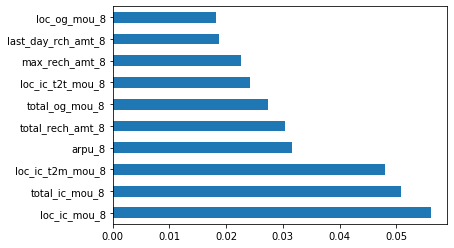

In [48]:
feat_importances = pd.Series(rfc_cls.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

**Top 10 features as per Random Forest model are:**
* loc_ic_mou_8
* total_ic_mou_8
* loc_ic_t2m_mou_8
* arpu_8
* total_rech_amt_8
* total_og_mou_8
* loc_ic_t2t_mou_8
* max_rech_amt_8
* last_day_rech_amt_8
* loc_og_mou_8 

As we can see, local incoming minutes of usage in the 8th month(total_ic_mou_8) seems to have the maximum effect on churning followed by total_ic_mou_8 which would cover both types of customers(normal customers who use both incoming and outgoing services) and customers who could be people who have kids or reltives abroad and who mostly use the service to receive incoming calls only.

Average revenu per user for the 8th month also help in dtermining people who are thinking of switching. The maximum recharge done by a customer and the last day on which recharge was done in the 8th month also determine inactive users.

All variables are from action phase(8th month).

### PCA Models(with and without sampling) - for predictions

Let's perform PCA first and then build different types of models and evaluate the performances. We will try models with both sampling and without sampling.

### PCA Model without Sampling

#### Principal Component Analysis (PCA)

In [49]:
# Let's check number of rows and columns in X_train
X_train.shape

(21000, 134)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [51]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# checking the components
pca.components_

array([[-6.02022225e-20,  1.24900090e-16, -5.55111512e-17, ...,
         2.64069402e-02,  1.06471488e-01,  1.61134415e-01],
       [-1.64351658e-19, -2.77555756e-17, -1.11022302e-16, ...,
        -4.67341719e-02,  1.66395085e-01,  1.27890688e-01],
       [ 7.58435758e-20, -2.08166817e-17,  4.16333634e-17, ...,
         2.94789007e-01,  1.16975725e-03,  2.05990443e-02],
       ...,
       [ 0.00000000e+00, -7.89495148e-03, -1.04484536e-01, ...,
        -2.42966275e-02, -7.07767178e-16, -3.53883589e-16],
       [-0.00000000e+00, -1.56837802e-01, -7.64189540e-02, ...,
        -4.89443916e-03,  2.81892565e-15,  2.46330734e-15],
       [ 9.99998823e-01,  9.26941357e-04, -1.17419251e-03, ...,
        -1.49281999e-04, -1.58293517e-16, -1.66370823e-16]])

In [53]:
# checking the explained_variance_ratio for each column
pca.explained_variance_ratio_

array([1.03491742e-01, 8.27012276e-02, 6.34349972e-02, 4.72771197e-02,
       4.54763000e-02, 3.30530865e-02, 2.94691319e-02, 2.84814670e-02,
       2.69003360e-02, 2.53058641e-02, 2.32366509e-02, 2.24318888e-02,
       2.16940139e-02, 2.10134259e-02, 1.92364861e-02, 1.82383499e-02,
       1.63425893e-02, 1.58106191e-02, 1.55298123e-02, 1.50027123e-02,
       1.41260100e-02, 1.25877807e-02, 1.23436332e-02, 1.18463401e-02,
       1.09310103e-02, 1.02651343e-02, 1.01874250e-02, 9.19977127e-03,
       8.73129182e-03, 8.46723281e-03, 8.07622285e-03, 7.61565449e-03,
       7.58426422e-03, 7.52414433e-03, 7.03881123e-03, 6.79351036e-03,
       6.59783239e-03, 6.56915113e-03, 6.45969238e-03, 6.16538690e-03,
       5.87011746e-03, 5.70028916e-03, 5.28165894e-03, 5.17125743e-03,
       4.77551078e-03, 4.53669009e-03, 4.45521461e-03, 4.30778911e-03,
       4.09248580e-03, 3.95877025e-03, 3.88113541e-03, 3.79665476e-03,
       3.70598709e-03, 3.55566316e-03, 3.48955004e-03, 3.29694145e-03,
      

Let's visualise and see the number of components explaining the maximum variance.

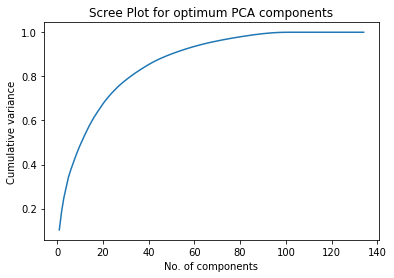

In [54]:
# Making a scree plot with explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.title("Scree Plot for optimum PCA components")
plt.xlabel('No. of components')
plt.ylabel('Cumulative variance')
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

More than 92% variance is explained by the first 60 components. Hence, can consider 60 as the optimum number of components

<BarContainer object of 134 artists>

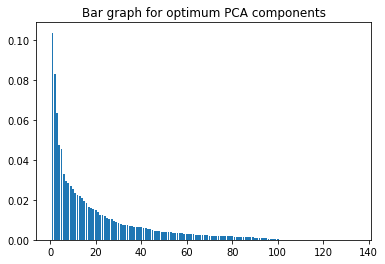

In [55]:
# Plotting a bar plot to check the optimum number of components

plt.title('Bar graph for optimum PCA components')
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [56]:
# perfrom PCA with 60 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
telecom_churn_train_pca = pca_final.fit_transform(X_train)
telecom_churn_train_pca_df = pd.DataFrame(telecom_churn_train_pca)
telecom_churn_train_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.542009,-1.181636,0.417754,1.454170,-2.554023,2.670665,-2.281898,-1.665768,-0.581754,-0.821414,...,-0.177074,0.176397,0.677216,0.014245,-0.864646,-0.950209,0.393507,0.302032,-0.309941,-0.380899
1,-0.170650,-1.734518,-1.115023,0.314325,-0.101002,0.666359,0.255863,0.971379,-0.999308,0.200467,...,-0.042854,-0.003515,0.136400,0.223049,-0.538606,0.049950,-0.086114,0.314266,0.765310,-0.025569
2,-1.406716,-0.294839,-1.592744,0.364837,-0.282937,0.582321,-0.476353,0.294573,0.999161,0.340919,...,0.229998,-0.329632,-0.058175,-0.201932,-0.110034,0.074398,0.076398,-0.273834,-0.077518,-0.236073
3,7.482220,1.035665,-2.127938,5.597397,4.260847,-2.330448,-1.535827,-0.298265,0.155107,-0.222868,...,-0.403593,-3.105496,2.342551,-0.987292,0.940507,-0.240467,3.771517,-1.421673,-2.655656,0.873470
4,-0.208699,-2.508732,-1.745944,-0.184569,0.356823,0.178047,0.494211,-1.565272,-0.636587,-0.283245,...,0.041365,-0.278252,-0.135453,0.003614,0.338044,-0.205052,0.116774,0.026908,-0.160617,-0.092905


In [57]:
# checking the number of rows and columns in the dataframe

telecom_churn_train_pca_df.shape

(21000, 60)

In [58]:
corrmat = np.corrcoef(telecom_churn_train_pca_df.transpose())

In [59]:
corrmat.shape

(60, 60)

In [60]:
# Applying transformation on the test set

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

#### Model 1- Logistic Regression Model

#### Applying logistic regression on the data on our Principal components

In [61]:
from sklearn.linear_model import LogisticRegression
logreg_pca = LogisticRegression()
model_pca = logreg_pca.fit(telecom_churn_train_pca_df, y_train)

#### Predictions on the Test set

In [62]:
pred_probs_test = model_pca.predict(df_test_pca)

In [63]:
# Cheking the roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.63'

In [64]:
# print classification report

print(classification_report(y_test, pred_probs_test)) 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8251
           1       0.67      0.28      0.39       750

    accuracy                           0.93      9001
   macro avg       0.81      0.63      0.68      9001
weighted avg       0.92      0.93      0.91      9001



This doesn't look like a good model at all. The roc_auc score is less. The recall values are very bad for the minority class i.e. '1'. The accuracy on the other hand is pretty high around 93%. All of these point towards an unstable model. Our motive is to maximise recall as we must identify the churners correctly.
This might be happening because of 'class imbalance'. So, let's try handling that through SMOTE and NearMiss techniques and see which is more suitable for our model.

**Handling Class Imbalance using SMOTE**

In [65]:
smo = SMOTE(random_state=2)
telecom_churn_train_res, y_train_res = smo.fit_sample(telecom_churn_train_pca_df, y_train)

In [66]:
# Let's check the count of classes after appyling SMOTE technique

print("After OverSampling, count of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, count of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, count of label '1': 19309
After OverSampling, count of label '0': 19309


#### Model 2: Logistic Regression after sampling

In [67]:
# Let's see how our Logistic Regression works now

smo_logreg = LogisticRegression().fit(telecom_churn_train_res, y_train_res)
smo_pred = smo_logreg.predict(df_test_pca)

In [68]:
# Cheking the roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, smo_pred))

'0.83'

In [69]:
# print classification report 
print(classification_report(y_test, smo_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8251
           1       0.31      0.83      0.45       750

    accuracy                           0.83      9001
   macro avg       0.64      0.83      0.67      9001
weighted avg       0.93      0.83      0.86      9001



The roc_auc_score is quite good and we can also see that the accuracy has come down to 83% and the recall values look good too.

**Handling Class Imbalance through NearMiss**

In [70]:
#NearMiss
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(telecom_churn_train_pca_df, y_train.ravel())

In [71]:
print("After Undersampling, count of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, count of label '0': {}".format(sum(y_train_miss == 0))) 

After Undersampling, count of label '1': 1691
After Undersampling, count of label '0': 1691


In [72]:
# Logistic Regression model

lr_nrmiss = LogisticRegression() 
lr_nrmiss.fit(X_train_miss, y_train_miss.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# Making predictions

predictions = lr_nrmiss.predict(df_test_pca)

In [74]:
# Cheking the roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, predictions))

'0.56'

In [75]:
# print classification report

print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.36      0.52      8251
           1       0.10      0.76      0.17       750

    accuracy                           0.39      9001
   macro avg       0.52      0.56      0.35      9001
weighted avg       0.87      0.39      0.49      9001



The scores are not that great. So, let's go ahead with **SMOTE for handling class imbalance**.

We already saw the scores with a basic Logistic regression model after sampling. Now, let's try building a decision tree and check the scores again.

#### Model 3: Decision tree with default parameters

In [76]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(telecom_churn_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

In [78]:
# Cheking the roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_default))

'0.77'

In [79]:
# Let's check the evaluation metrics of our default model
# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8251
           1       0.23      0.77      0.36       750

    accuracy                           0.77      9001
   macro avg       0.60      0.77      0.61      9001
weighted avg       0.91      0.77      0.82      9001



The scores look pretty decent. Let's tune hyperparameters and check.

**Tuning max_depth**

In [80]:
# Tuning max_depth
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   n_jobs=-1)
tree.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 30)}, pre_dispatch='2*n_jobs',
   

In [81]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.259036,0.007654,0.000000,0.000000,1,{'max_depth': 1},0.664293,0.670637,0.676463,0.671630,...,0.670024,0.004143,29,0.673140,0.669224,0.670292,0.671500,0.673604,0.671552,0.001658
1,0.433890,0.016397,0.006847,0.007248,2,{'max_depth': 2},0.667400,0.665199,0.680218,0.675903,...,0.672070,0.005482,28,0.676345,0.669936,0.673626,0.674640,0.677067,0.674323,0.002508
2,0.605232,0.012168,0.006249,0.007653,3,{'max_depth': 3},0.736924,0.733040,0.739902,0.742846,...,0.738697,0.003410,27,0.742895,0.741309,0.742086,0.739926,0.741706,0.741584,0.000981
3,0.779796,0.007827,0.000000,0.000000,4,{'max_depth': 4},0.770456,0.768384,0.774469,0.776771,...,0.773137,0.003189,26,0.781381,0.773127,0.779828,0.778055,0.780515,0.778581,0.002938
4,0.952668,0.008133,0.003124,0.006249,5,{'max_depth': 5},0.790523,0.788452,0.792465,0.799948,...,0.793490,0.004088,25,0.806241,0.797695,0.802162,0.803852,0.804046,0.802799,0.002862


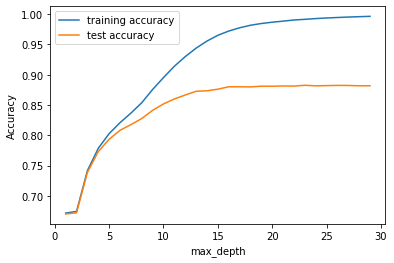

In [82]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

So we can see, as max_depth increases, accuracy also increases only upto max_depth=10.

#### Tuning min_samples_leaf

In [83]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 300, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   n_jobs=-1)
tree.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 300, 20)},
             pre

In [84]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.717701,0.052906,0.011503,0.005663,5,{'min_samples_leaf': 5},0.863024,0.869239,0.870404,0.874142,...,0.870346,0.004246,1,0.958665,0.960801,0.959118,0.960479,0.958764,0.959565,0.000896
1,2.184226,0.043127,0.006248,0.007652,25,{'min_samples_leaf': 25},0.834283,0.847359,0.845676,0.847210,...,0.844244,0.005015,2,0.893086,0.891500,0.888295,0.888882,0.890727,0.890498,0.001745
2,1.994755,0.061281,0.008841,0.005584,45,{'min_samples_leaf': 45},0.818099,0.832341,0.838037,0.844620,...,0.833834,0.008818,3,0.868712,0.864407,0.864860,0.864476,0.868263,0.866144,0.001925
3,1.880246,0.045284,0.004388,0.001017,65,{'min_samples_leaf': 65},0.814345,0.821336,0.825738,0.830377,...,0.823166,0.005301,4,0.854567,0.848352,0.849647,0.849490,0.852533,0.850918,0.002287
4,1.782363,0.044179,0.006316,0.004653,85,{'min_samples_leaf': 85},0.810073,0.817840,0.822890,0.823773,...,0.819307,0.005045,5,0.843368,0.839645,0.841393,0.838550,0.846707,0.841933,0.002892


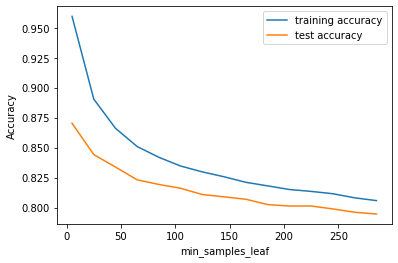

In [85]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At values > 250, the model looks more stable and the test and train accuracy start to converge. 

#### Tuning min_samples_split

In [86]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   n_jobs=-1)
tree.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pr

In [87]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.047757,0.098852,0.000798,0.001596,5,{'min_samples_split': 5},0.876359,0.874676,0.881020,0.878545,...,0.878787,0.003115,1,0.993332,0.993947,0.993753,0.992847,0.994012,0.993578,0.000436
1,2.982908,0.087113,0.004987,0.000892,25,{'min_samples_split': 25},0.858881,0.867038,0.865614,0.864301,...,0.865063,0.003536,2,0.956043,0.956043,0.955622,0.955430,0.956530,0.955934,0.000382
2,3.102828,0.196232,0.005984,0.001092,45,{'min_samples_split': 45},0.848783,0.863672,0.857975,0.855497,...,0.857087,0.004930,3,0.929242,0.933903,0.933676,0.931283,0.934488,0.932519,0.001970
3,3.169531,0.187252,0.003192,0.002631,65,{'min_samples_split': 65},0.837260,0.856163,0.852408,0.852001,...,0.850769,0.006976,4,0.911795,0.918593,0.916100,0.912348,0.918822,0.915532,0.002987
4,3.032530,0.078150,0.006116,0.005170,85,{'min_samples_split': 85},0.825867,0.847359,0.851113,0.851094,...,0.845150,0.009740,5,0.900855,0.903509,0.900240,0.900437,0.906911,0.902390,0.002549


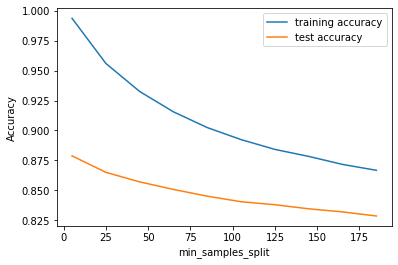

In [88]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the min_samples_split increases, the model becomes less complex and hence, overfits less too.

In [89]:
# Grid Search to find multiple optimal hyperparameters together
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 300, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(telecom_churn_train_res, y_train_res)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [90]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.612298,0.054991,0.003192,0.000399,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.771491,0.783402,0.792077,0.775735,0.780785,0.780698,0.007017,49
1,1.587746,0.092308,0.003990,0.002523,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.771491,0.783402,0.792077,0.775735,0.780785,0.780698,0.007017,49
2,1.587201,0.172978,0.003124,0.006248,entropy,5,50,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.771491,0.783402,0.792077,0.775735,0.780785,0.780698,0.007017,49
3,1.497136,0.040943,0.001596,0.001955,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772139,0.782885,0.790782,0.774699,0.780267,0.780154,0.006549,55
4,1.488366,0.035717,0.005585,0.005186,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772139,0.782885,0.790782,0.774699,0.780267,0.780154,0.006549,55
5,1.460095,0.035187,0.003391,0.000489,entropy,5,100,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772139,0.782885,0.790782,0.774699,0.780267,0.780154,0.006549,55
6,1.454111,0.044771,0.003191,0.000399,entropy,5,150,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.776152,0.782755,0.790782,0.774699,0.780267,0.780931,0.005701,46
7,1.529635,0.102989,0.000807,0.001165,entropy,5,150,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.776152,0.782755,0.790782,0.774699,0.780267,0.780931,0.005701,46
8,1.541964,0.068124,0.003192,0.002222,entropy,5,150,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.776152,0.782755,0.790782,0.774699,0.780267,0.780931,0.005701,46
9,1.476558,0.074069,0.002194,0.001828,entropy,5,200,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772916,0.783273,0.790782,0.775735,0.780655,0.780672,0.006221,52


In [91]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8255479422706715
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Model 4: Decision tree with best parameters obtained from grid search.

In [92]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(telecom_churn_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [93]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.8030218864570603

In [94]:
# Making predictions
y_pred = clf_gini.predict(df_test_pca)

In [95]:
# Cheking the roc_auc_score

"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.75'

In [96]:
# print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8251
           1       0.25      0.68      0.37       750

    accuracy                           0.80      9001
   macro avg       0.61      0.75      0.62      9001
weighted avg       0.91      0.80      0.84      9001



The accuracy has increased, but recall values and roc_auc_score have come down. Let's reducte the max_depth to 5 and check again.

#### Model 5: Decision tree with optimum parameters and changing max_depth to 5

In [97]:
# model with optimal hyperparameters(max_depth=5)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(telecom_churn_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [98]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.7693589601155427

In [99]:
# Making predictions
y_pred = clf_gini.predict(df_test_pca)

In [100]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.77'

In [101]:
# print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      8251
           1       0.23      0.77      0.36       750

    accuracy                           0.77      9001
   macro avg       0.60      0.77      0.61      9001
weighted avg       0.91      0.77      0.82      9001



Clearly, the recall scores and roc_auc_score have improved. Accuracy has come down a bit.

#### Model 6: Random Forest with default parameters

In [102]:
# Random Forests
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [103]:
# fit
rfc.fit(telecom_churn_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# Making predictions
def_rfc_pred = rfc.predict(df_test_pca)

In [105]:
# Let's check the report of our default model
print(classification_report(y_test,def_rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8251
           1       0.51      0.53      0.52       750

    accuracy                           0.92      9001
   macro avg       0.73      0.74      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [106]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, def_rfc_pred))

'0.74'

The scores dont look that great. Recall value for class=1 is pretty low and accuracy is pretty high. Let's tune parameters and check.

In [107]:
# Tuning max_depth
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,
                 n_jobs=-1)
rf.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [108]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.401182,0.052479,0.221039,0.052479,2,{'max_depth': 2},0.784568,0.786121,0.790135,0.796064,...,0.789580,0.004037,4,0.794912,0.786399,0.789215,0.794951,0.791811,0.791457,0.003313
1,10.035641,0.142884,0.074202,0.003253,7,{'max_depth': 7},0.854221,0.861341,0.861600,0.862100,...,0.859651,0.002918,3,0.874409,0.873697,0.872046,0.872601,0.873539,0.873259,0.000836
2,15.033078,0.227655,0.122513,0.009857,12,{'max_depth': 12},0.925298,0.925686,0.926722,0.927619,...,0.925656,0.001575,2,0.963391,0.963423,0.962744,0.963586,0.963586,0.963346,0.000312
3,17.515979,0.403627,0.132319,0.015893,17,{'max_depth': 17},0.950414,0.946142,0.950414,0.951314,...,0.949143,0.001994,1,0.987020,0.988347,0.987570,0.986923,0.987636,0.987499,0.000511


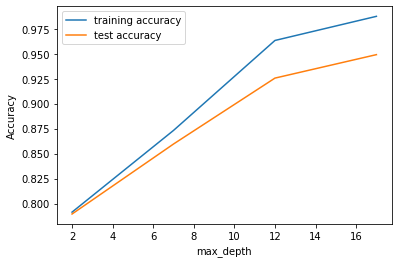

In [109]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The accuracy seems to be increasing till max_depth=12 after which it kind of starts becoming stable.

In [110]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,
                 n_jobs=-1)
rf.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [111]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.155005,0.109230,0.091198,0.011099,100,{'min_samples_leaf': 100},0.847488,0.858752,0.856680,0.861971,...,0.856466,0.004840,1,0.872402,0.870784,0.869101,0.869591,0.870691,0.870514,0.001142
1,10.984560,0.151388,0.086766,0.009954,150,{'min_samples_leaf': 150},0.840238,0.848783,0.852279,0.852907,...,0.848387,0.004529,2,0.861818,0.858872,0.858549,0.857582,0.857744,0.858913,0.001530
2,10.245441,0.115351,0.072858,0.007603,200,{'min_samples_leaf': 200},0.833635,0.843475,0.843216,0.844361,...,0.840696,0.004024,3,0.852496,0.850651,0.848320,0.848066,0.850461,0.849999,0.001639
3,9.562468,0.059689,0.080792,0.005368,250,{'min_samples_leaf': 250},0.830269,0.836872,0.844381,0.842419,...,0.837977,0.005010,4,0.846184,0.845666,0.845148,0.843729,0.844020,0.844949,0.000941
4,9.098998,0.068169,0.067567,0.006492,300,{'min_samples_leaf': 300},0.826385,0.834801,0.835189,0.838664,...,0.834067,0.004085,5,0.842105,0.840454,0.840875,0.840557,0.841560,0.841110,0.000630


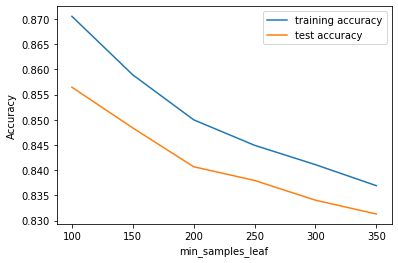

In [112]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [113]:
# Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,
                 n_jobs=-1)
rf.fit(telecom_churn_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [114]:
# Grid search to find optimum values for min_samples_leaf and min_samples_split
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [115]:
# Fit the grid search to the data
grid_search.fit(telecom_churn_train_res, y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8526075445076892 using {'min_samples_leaf': 100, 'min_samples_split': 200}


#### Model 7: Random Forest model with optimum hyperparameters

In [117]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200)

In [118]:
rfc.fit(telecom_churn_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [120]:
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8251
           1       0.37      0.75      0.50       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.92      0.87      0.89      9001



In [121]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions))

'0.82'

The accuracy, roc_auc_score and recall values look good. Let's reduce the max_depth to 5 and evaluate the model again.

#### Model 8: Random Forests model with optimum parameters changing max_depth to 5.

In [122]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=200)

In [123]:
rfc.fit(telecom_churn_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [125]:
# print classification report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8251
           1       0.33      0.77      0.46       750

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.69      9001
weighted avg       0.92      0.85      0.88      9001



In [126]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions))

'0.81'

The recall value for churn=1 has increased. Accuracy has come down a bit and the roc_auc_score has increased too.

In [127]:
# Grid search to find optimum n_estimators value
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [128]:
# Fit the grid search to the data
grid_search.fit(telecom_churn_train_res, y_train_res)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [129]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8534102964192378 using {'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


#### Model 9: Random Forests model with all above optimum parameters and n_estimators=300

In [130]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=300)

In [131]:
rfc.fit(telecom_churn_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
# making predictions
predictions = rfc.predict(df_test_pca)

In [133]:
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8251
           1       0.32      0.77      0.45       750

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.87      9001



In [134]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions))

'0.81'

The above model looks good. Let's try tuning the max_features value as well and see.

In [135]:
# Grid search to find optimum max_features value
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [136]:
# Fit the grid search to the data
grid_search.fit(telecom_churn_train_res, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   36.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [137]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8535656603592673 using {'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200}


#### Model 10: Random Forests model with optimum parameters adding max_features=10

In [138]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=300,
                            max_features=10)

In [139]:
rfc.fit(telecom_churn_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [141]:
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8251
           1       0.32      0.77      0.46       750

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.87      9001



In [142]:
# print confusion matrix
print(confusion_matrix(y_test,predictions))

[[7042 1209]
 [ 170  580]]


In [143]:
# Cheking the roc_auc_score
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions))

'0.81'

# Business Insights

The final random forest model looks good as it has the highest recall value for churn=1 which is what we want as we want to predict the people who churn accurately.

**Logistic Regression model is the best performance wise in predicting the customers who churn accurately as it has highest recall for class=1 out of the three models. It has good roc_auc_score as well.**

**Strategy for reducing churn**
- Business needs to pay attention to the below rates:
    - roaming rates
    - incoming
    - outgoing
    - recharge amount for data
- They need to provide good offers or better package to the customers.
- Overall rates to be looked at. 
- It will be a good idea to give better scheme to customers who are using the service for long time. 
- since the indicators show overall issues with all parameters, it is good to touch base with those particular customers.